# Logistic 回归



### Sigmoid 函数

Sigmoid 函数是一种常用的激活函数，主要用于二分类问题中。它的数学表达式为：

$ S(x) = \dfrac{1}{1 + e^{-x}} $

其中：
- $ S(x) $ 是函数的输出
- $ x $ 是输入
- $ e $ 是自然对数的底

#### 特点

1. **输出范围**：Sigmoid 函数的输出范围在 (0, 1) 之间。
2. **S形曲线**：函数图像呈S形。
3. **平滑梯度**：函数具有平滑的梯度，这有助于梯度下降优化。

#### 缺点

1. **梯度消失问题**：在两端的梯度非常小，这可能在反向传播过程中导致“梯度消失”问题。
2. **非零中心化输出**：输出不是零中心化的，这可能导致优化的困难。

### 在机器学习中的应用

#### 1. 逻辑回归

在逻辑回归中，Sigmoid 函数用于将线性组合的输出映射到 (0, 1) 的范围内，以便输出可以被解释为概率。

$ P(Y=1|X) = S(W^TX + b) $

其中：
- $ P(Y=1|X) $ 是给定输入 X 类别为 1 的概率
- $ W $ 是权重
- $ X $ 是输入特征
- $ b $ 是偏置项

#### 2. 神经网络

在神经网络中，Sigmoid 函数常用作隐藏层的激活函数。给定一个输入 $ x $，Sigmoid 函数将其转换为一个介于 0 和 1 之间的输出。这个输出然后被用作下一层的输入。

#### 3. 二分类问题

由于 Sigmoid 函数的输出范围在 (0, 1) 之间，它经常用于二分类问题。如果 Sigmoid 的输出大于 0.5，我们可以将输出类别标记为 1，否则标记为 0。

#### 4. 概率估计

在某些情况下，我们可能对输出的确切概率感兴趣。由于 Sigmoid 函数的输出可以解释为概率，因此它可以用于估计类别的概率。

### 总结

Sigmoid 函数由于其良好的特性（如平滑的梯度和输出的概率解释）在机器学习中得到了广泛的应用。然而，由于其一些缺点（如梯度消失和非零中心化输出），在深度学习领域，其他激活函数（如ReLU）也得到了广泛的关注和应用。

## 逻辑回归

### 逻辑回归：似然函数

$$
y(x) = \sigma(\mathbf{w}^T \mathbf{x}) = \frac{1}{1 + e^{-\mathbf{w}^T \mathbf{x}}}
$$


$$
p(\mathbf{t} \mid \mathbf{w})=\prod_{n=1}^N y_n^{t_n}\left(1-y_n\right)^{1-t_n}
$$

### 逻辑回归：误差函数

$$
E(\mathbf{w})=-\ln p(\mathbf{t} \mid \mathbf{w})=-\sum_{n=1}^N\left[t_n \ln y_n+\left(1-t_n\right) \ln \left(1-y_n\right)\right]
$$

### 逻辑回归：梯度

$$
\begin{aligned}
& \sigma(a)=\frac{1}{1+e^{-a}} \\
& \frac{d \sigma(a)}{d a}=\frac{-e^{-a}}{-\left(1+e^{-a}\right)^2}=\sigma(a)[1-\sigma(a)] \\
& E(\mathbf{w})=-\sum_{n=1}^N\left[t_n \ln y_n+\left(1-t_n\right) \ln \left(1-y_n\right)\right] \\
& \frac{d E(\mathbf{w})}{d \mathbf{w}}=-\sum_{n=1}^N\left[\frac{t_n}{y_n}-\frac{\left(1-t_n\right)}{1-y_n}\right] \frac{d y_n}{d \mathbf{w}}
\end{aligned}
$$


### 高阶导数


逻辑回归中最经典的损失函数是交叉熵损失函数。当我们有数据集 $ \{ (\mathbf{x}_i, t_i) \}_{i=1}^N $，其中 $ t_i $ 是标签（0或1），而 $ \mathbf{x}_i $ 是输入向量，逻辑回归模型的预测为：

$$ p(t_i = 1 | \mathbf{x}_i; \mathbf{w}) = \sigma(\mathbf{w}^T \mathbf{x}_i) $$

其中 $ \sigma(z) $ 是sigmoid函数，定义为：

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

于是，交叉熵损失函数定义为：

$$ E(\mathbf{w}) = -\sum_{i=1}^N \left[ t_i \log \sigma(\mathbf{w}^T \mathbf{x}_i) + (1 - t_i) \log (1 - \sigma(\mathbf{w}^T \mathbf{x}_i)) \right] $$

关于 $ \mathbf{w} $ 的一阶导数（或梯度）是：

$$ \nabla E(\mathbf{w}) = \sum_{i=1}^N (\sigma(\mathbf{w}^T \mathbf{x}_i) - t_i) \mathbf{x}_i $$

关于 $ \mathbf{w} $ 的二阶导数（或Hessian矩阵）是：

$$ \nabla^2 E(\mathbf{w}) = \sum_{i=1}^N \sigma(\mathbf{w}^T \mathbf{x}_i) (1 - \sigma(\mathbf{w}^T \mathbf{x}_i)) \mathbf{x}_i \mathbf{x}_i^T $$

其中，Hessian矩阵是一个对称矩阵，其尺寸取决于权重向量 $ \mathbf{w} $ 的维度。

注意，这里给出的导数公式是基于简化和常用的推导。在实际应用中，我们经常使用优化算法（如梯度下降或牛顿法）来找到损失函数的最小值，这涉及到计算上述导数。

#### Hessian矩阵

Hessian矩阵是一个多变量函数的二阶偏导数组成的方阵，它为我们提供了关于函数曲率的信息，并在优化算法，特别是牛顿法中扮演了重要角色。

具体地说，对于一个实值的多元函数 $f: \mathbb{R}^n \to \mathbb{R}$，其Hessian矩阵 $H(f)$ 在某点 $\mathbf{x}$ 定义为：

$ H(f)_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j} $

所以，Hessian矩阵的元素是函数 $f$ 关于它的变量的二阶偏导数。

用矩阵形式表示，Hessian矩阵 $H$ 为：

$$
H(f) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \dots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$

其中，因为二阶偏导数是可交换的（即 $\frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{\partial^2 f}{\partial x_j \partial x_i}$），Hessian矩阵是对称的。

Hessian矩阵的性质和特征值给了我们函数的局部几何特性的很多信息。例如：

- 如果Hessian在某点是正定的，那么该函数在该点有一个局部最小值。
- 如果Hessian在某点是负定的，那么该函数在该点有一个局部最大值。
- 如果Hessian在某点是不定的（即它有正特征值和负特征值），那么该点是一个鞍点。

这些性质在优化问题中，特别是在使用牛顿法时，是非常有用的。
### 梯度下降法

$$
\mathbf{w}^{(\tau+1)}=\mathbf{w}^{(\tau)}-\eta \boldsymbol{\nabla}_{\mathbf{w}} E(\mathbf{w})
$$

- $\eta$ 是步长或学习率，可取固定值或（通过一维方法得到）优化值。
- 当数据个数太多时，可采用迭代时每次只利用一个训练数据点。这也被称为随机梯度下降法。（SGD）
  - 有利于逃离鞍点

### 基函数的使用

- $y(\mathbf{x})=\sigma\left(\mathbf{w}^{\mathrm{T}} \mathbf{x}\right)$
- 与线性回归类似, 可引入基函数。
$$
y(\mathbf{x})=\sigma\left(\sum_{j=0}^M w_j \phi_j(\mathbf{x})\right)=\sigma\left(\mathbf{w}^T \boldsymbol{\phi}(\mathbf{x})\right)
$$
- 此时 $\mathbf{w}$ 的数目不再与 $\mathbf{x}$ 的分量数目相关, 而是等于基函数 的数目。
$$
\frac{d E(\mathbf{w})}{d \mathbf{w}}=-\sum_{n=1}^N\left[\frac{t_n}{y_n}-\frac{\left(1-t_n\right)}{1-y_n}\right] \frac{d \sigma}{d \mathbf{w}}=\sum_{n=1}^N\left(y_n-t_n\right) \mathbf{\phi}\left(\mathbf{x}_n\right)
$$


## 多类别分类

### 方法1：one-vs-all

- 对于 $K$ 类别的分类问题, 采用 $K$ 个二分类器, 每个二分类器分别判断样本是否属于该类别。
- 优点: 可以采用任意二分类器, 且训练简单。
- 缺点: 由于每个二分类器都是独立的, 因此不能利用类别之间的关系。


### 方法2：softmax

- 对于每个类别$i$，定义

$$
z_i(\mathrm{x})=\mathbf{w}_i^{\mathrm{T}} \mathrm{x}+w_{i 0}
$$

- 利用softmax函数来计算数据点 $\mathrm{x}$ 属于类别 $i$ 的概率

$$
y_i(\mathrm{x})=\frac{\exp \left(z_i(\mathrm{x})\right)}{\sum_{k=1}^{K} \exp \left(z_k(\mathrm{x})\right)} = \frac{\exp \left(\mathbf{w}_i^{\mathrm{T}} \mathrm{x}+w_{i 0}\right)}{\sum_{k=1}^{K} \exp \left(\mathbf{w}_k^{\mathrm{T}} \mathrm{x}+w_{k 0}\right)}
$$

  - 这是用于多分类互斥的情形

## sklearn中的逻辑回归

### 导入必要的库

首先，我们需要导入一些必要的库。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### 加载数据集

接下来，我们将使用 `sklearn` 中的鸢尾花数据集。

In [5]:
# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

### 数据预处理

我们将数据分为训练集和测试集，并进行标准化处理。

In [6]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 创建并训练模型

现在，我们将创建一个 Logistic 回归模型，并使用训练数据来拟合它。

In [7]:
# 创建 Logistic 回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

LogisticRegression()

### 模型评估

我们可以使用准确率来评估模型的性能。

In [8]:
# 测试模型
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy*100:.2f}%')

Model Accuracy: 100.00%


### 预测

最后，我们可以使用模型进行预测。

In [9]:
# 进行预测
predictions = model.predict(X_test)

# 显示前5个预测值
print(f'Predictions: {predictions[:5]}')
print(f'Actual values: {y_test[:5]}')

Predictions: [1 0 2 1 1]
Actual values: [1 0 2 1 1]


## 可视化

### iris 数据集
- 我们可以选择其中两个特征来进行二维可视化。下面是一个简单的例子，展示了如何使用 matplotlib 来可视化 Logistic 回归的结果。


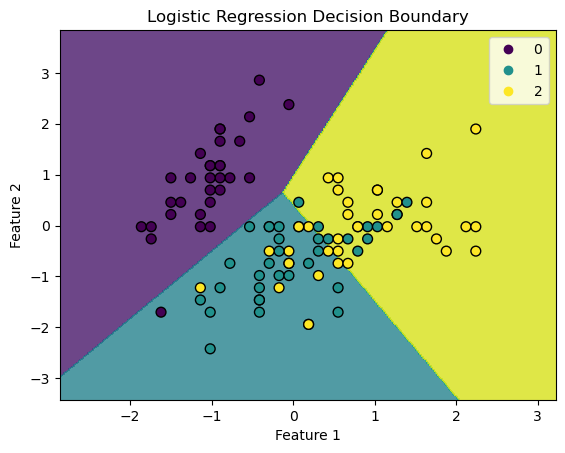

In [11]:
# 选择两个特征
X_2_features = X[:, :2]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_2_features, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 创建 Logistic 回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

import matplotlib.pyplot as plt

# 创建一个网格，用于绘制决策边界
h = .02  # 网格中的步长
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 预测每个点的类别，用于绘制决策边界
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contourf(xx, yy, Z, alpha=0.8)

# 绘制训练数据点
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')

# 添加图例
plt.legend(*scatter.legend_elements(), loc="upper right")
plt.show()


## 可视化-2

- breast-cancer 数据集

Model Accuracy: 98.25%


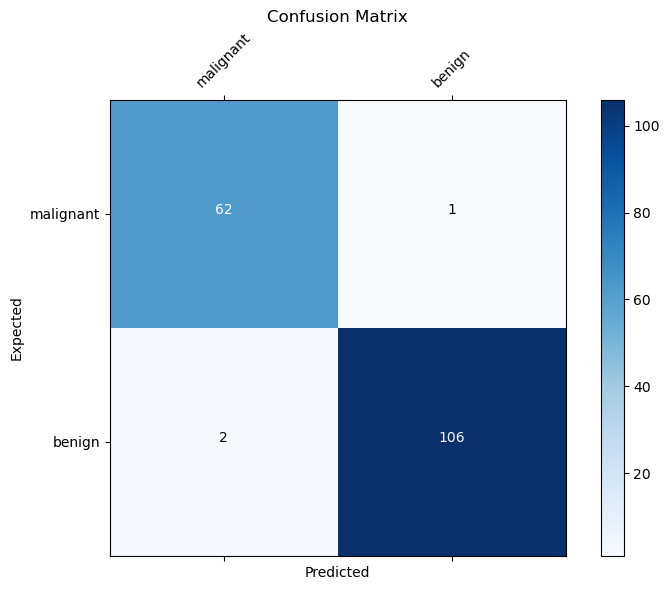

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import itertools


# 加载数据集
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 创建 Logistic 回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 测试模型
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy*100:.2f}%')

# 预测
predictions = model.predict(X_test)

# 计算混淆矩阵
conf_mat = confusion_matrix(y_test, predictions)

# 绘制混淆矩阵
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

# 添加标签
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('Confusion Matrix')

# 添加文本标签
class_names = cancer.target_names
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = conf_mat.max() / 2.
for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, format(conf_mat[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_mat[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


## 可视化-3

- wine 数据集

Model Accuracy: 74.07%


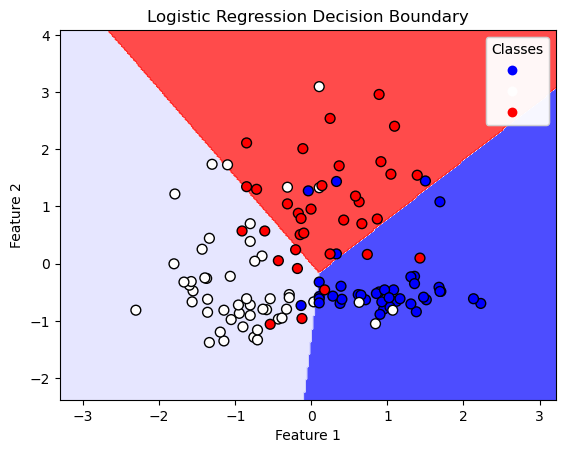

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 加载数据集
wine = datasets.load_wine()
X = wine.data[:, :2]  # 仅使用前两个特征以便于可视化
y = wine.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 创建 Logistic 回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 创建一个网格，用于绘制决策边界
h = .02  # 网格中的步长
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 预测每个点的类别，用于绘制决策边界
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 测试模型准确度
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy*100:.2f}%')

# 绘制决策边界
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.bwr)

# 绘制训练数据点
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=50, cmap=plt.cm.bwr)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')

# 添加图例
legend1 = plt.legend(handles=scatter.legend_elements()[0], title="Classes", loc="upper right")
plt.gca().add_artist(legend1)  # 保持第一个图例

plt.show()
